In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys
import time

In [33]:
def getSizeInMb(object):
  return sys.getsizeof(object) / 1024 / 1024

In [34]:
def getRandomWordInText(text):
  words = text.split(" ")
  return words[np.random.randint(0, len(words))]

## ALGORITHMS

### Z ALGORITHM

In [35]:
def getZarr(string, z):
  n = len(string)
  l, r, k = 0, 0, 0
  for i in range(1, n):
    if i > r:
      l, r = i, i
      while r < n and string[r - l] == string[r]:
        r += 1
      z[i] = r - l
      r -= 1
    else:
      k = i - l
      if z[k] < r - i + 1:
        z[i] = z[k]
      else:
        l = i
        while r < n and string[r - l] == string[r]:
          r += 1
        z[i] = r - l
        r -= 1

In [36]:
def Z(text, pattern):
  concat = pattern + "$" + text
  l = len(concat)

  z = [0] * l
  getZarr(concat, z)

  occurrences = []
  for i in range(l):
    if z[i] == len(pattern):
      occurrences.append(i - len(pattern) - 1)
  return occurrences

In [37]:
# PRUEBAS
text = "Hola mundo, hol mundos, holas mundo, mundo hola"
pattern = "mundo"
print(Z(text, pattern))

[5, 16, 30, 37]


### ANAGRAM SEARCH

In [38]:
MAX=256

def compare(arr1, arr2):
  for i in range(MAX):
    if arr1[i] != arr2[i]:
      return False
  return True

In [39]:
MAX=256

def Anagram(pattern, text):

  M = len(pattern)
  N = len(text)
  occurrences =[]

  countP = [0]*MAX
  countTW = [0]*MAX

  for i in range(M):
    (countP[ord(pattern[i]) ]) += 1
    (countTW[ord(text[i]) ]) += 1

  for i in range(M,N):
    if compare(countP, countTW):
      occurrences.append(i-M)

    (countTW[ ord(text[i]) ]) += 1 #Añadir un caracter 
    (countTW[ ord(text[i-M]) ]) -= 1 #Eliminar el primer caracter
    
  if compare(countP, countTW):
      occurrences.append(N-M)

  return occurrences

In [40]:
# PRUEBAS
text = "Hola mundo, hol mundos, holas mundo, mundo hola"
pattern = "mundo"
Anagram(pattern, text)

[5, 16, 30, 37]

## LOADING DATA

In [41]:
base_path = os.path.dirname(os.getcwd())
data_path = os.path.join(base_path, "data\\news_summary_more.csv")

data = pd.read_csv(data_path)
data = data.drop("headlines", axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    98401 non-null  object
dtypes: object(1)
memory usage: 768.9+ KB


In [42]:
data_25 = data.sample(frac=0.25)
data_50 = data.sample(frac=0.50)
data_75 = data.sample(frac=0.75)
data_100 = data

In [43]:
str_25 = " ".join(data_25.text)
str_50 = " ".join(data_50.text)
str_75 = " ".join(data_75.text)
str_100 = " ".join(data_100.text)

In [44]:
# redondear a 2 decimales
print(f"Size of str_25: {getSizeInMb(str_25)} MB")
print(f"Size of str_50: {getSizeInMb(str_50)} MB")
print(f"Size of str_75: {getSizeInMb(str_75)} MB")
print(f"Size of str_100: {getSizeInMb(str_100)} MB")

Size of str_25: 8.400510787963867 MB
Size of str_50: 16.80044174194336 MB
Size of str_75: 25.188962936401367 MB
Size of str_100: 33.587021827697754 MB


In [45]:
final_data = [
  [str_25, [getRandomWordInText(str_25) for _ in range(5)]],
  [str_50, [getRandomWordInText(str_50) for _ in range(5)]],
  [str_75, [getRandomWordInText(str_75) for _ in range(5)]],
  [str_100, [getRandomWordInText(str_100) for _ in range(5)]]
]
str_data = [str_25, str_50, str_75, str_100]

## METHODOLOGY

In [46]:
str_names = "str_25, str_50, str_75, str_100".split(", ")

In [47]:
# 3m de ejecucion
z_results = []

for text, words in final_data:
  result = []
  
  for word in words:
    start_time = time.time()
    Z(text, word)
    end_time = time.time()
 
    execution_time = end_time - start_time
    result.append(execution_time)
  
  z_results.append(result)
  print(" OK! \n")


 OK! 

 OK! 

 OK! 

 OK! 



In [48]:
str_names = "str_25, str_50, str_75, str_100".split(", ")

In [49]:
#35m
anagram_results = []

for text, words in final_data:
  result = []
  
  for word in words:
    start_time = time.time()
    Anagram(word, text)
    end_time = time.time()
 
    execution_time = end_time - start_time
    result.append(execution_time)
  
  anagram_results.append(result)
  print(" OK! \n")

 OK! 

 OK! 

 OK! 

 OK! 



## RESULTS

In [50]:
colors = ["#92283e", "#336353", "#f0783e", "#436879", "#715948"]

Text(0.5, 1.0, 'Size in MB per sample')

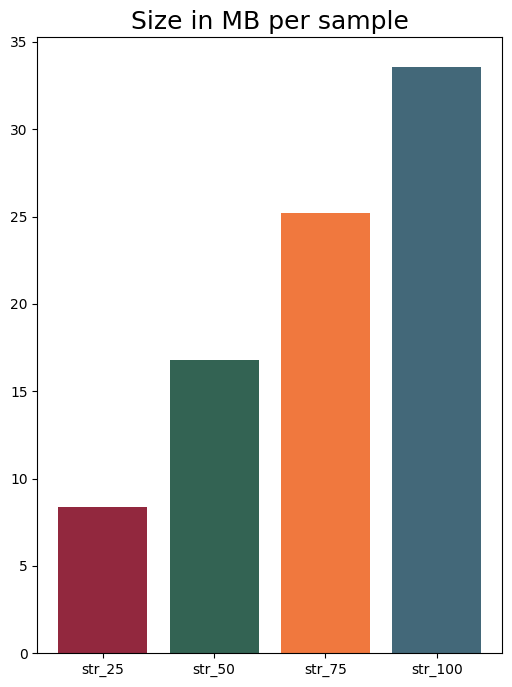

In [51]:
fig, ax = plt.subplots(figsize=(6,8))
datasets_size = [getSizeInMb(x) for x in str_data]
ax.bar(str_names, datasets_size, width=0.8, color=colors)
ax.set_title('Size in MB per sample', loc='center', fontsize=18)

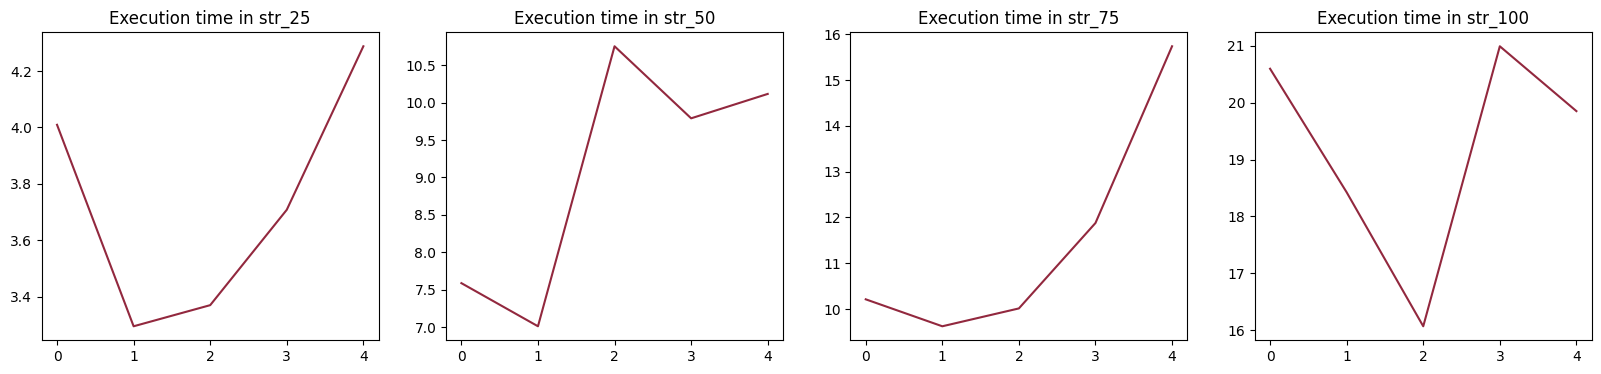

In [52]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
for i in range(len(axs)):
  ax = axs[i]
  ax.plot(z_results[i], color=colors[0])
  ax.set_title(f"Execution time in {str_names[i]}")

Text(0.5, 1.0, 'Mean execution time per dataset')

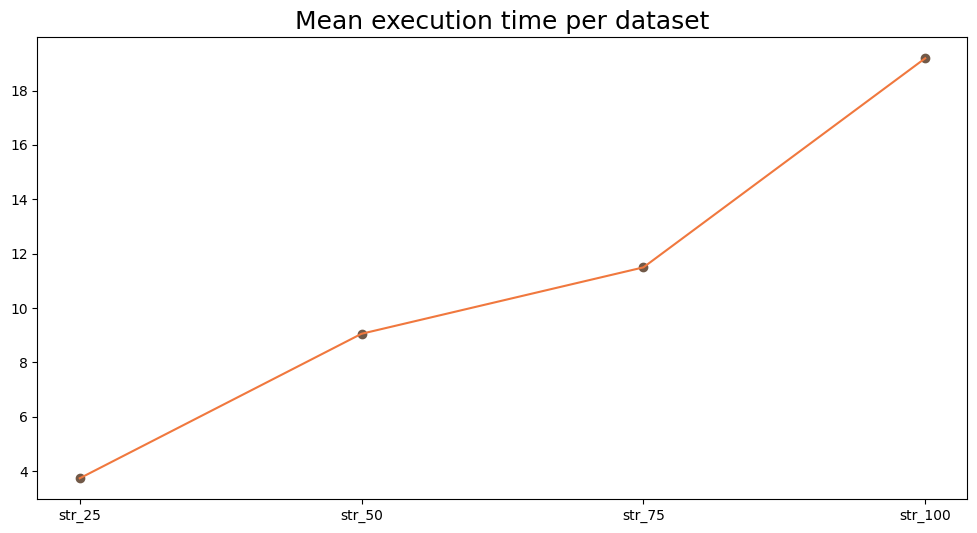

In [53]:
z_mean = [np.mean(i) for i in z_results]
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(4), z_mean, color=colors[4])
ax.plot(str_names, z_mean, color=colors[2])
ax.set_title("Mean execution time per dataset", loc='center', fontsize=18)

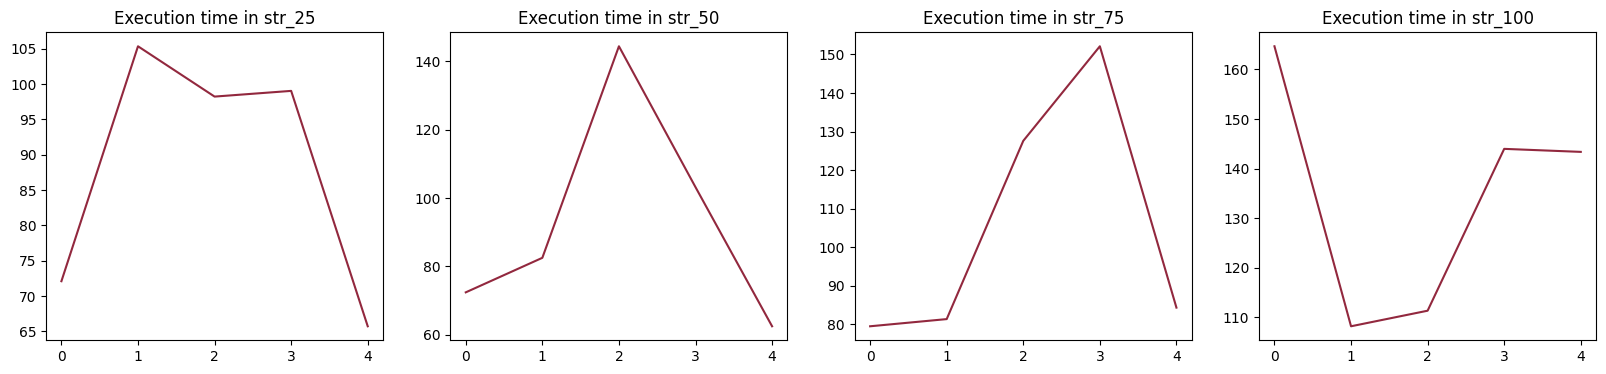

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
for i in range(len(axs)):
  ax = axs[i]
  ax.plot(anagram_results[i], color=colors[0])
  ax.set_title(f"Execution time in {str_names[i]}")

Text(0.5, 1.0, 'Mean execution time per dataset')

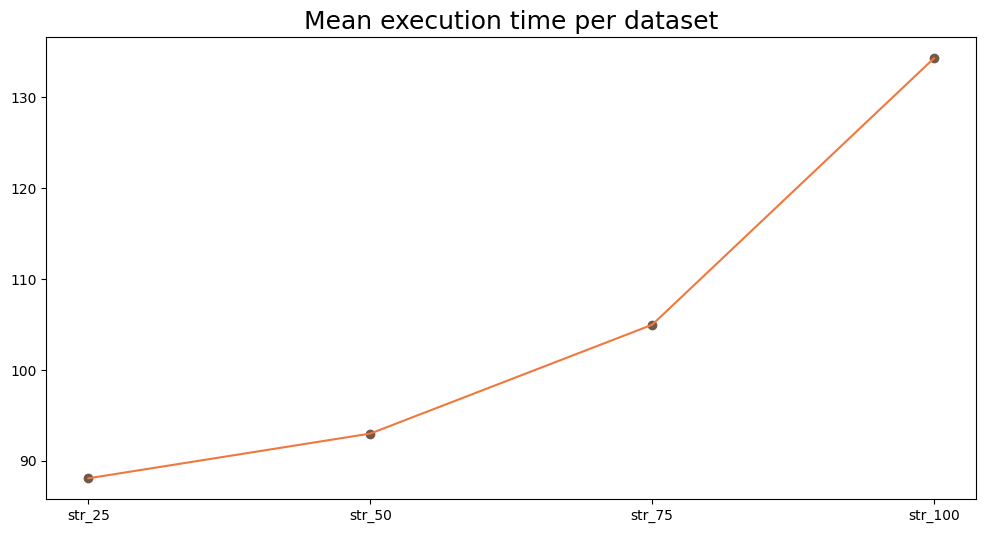

In [55]:
anagram_mean = [np.mean(i) for i in anagram_results]
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(4), anagram_mean, color=colors[4])
ax.plot(str_names, anagram_mean, color=colors[2])
ax.set_title("Mean execution time per dataset", loc='center', fontsize=18)

Text(0.5, 1.0, 'Z vs Anagram algorithm at runtime')

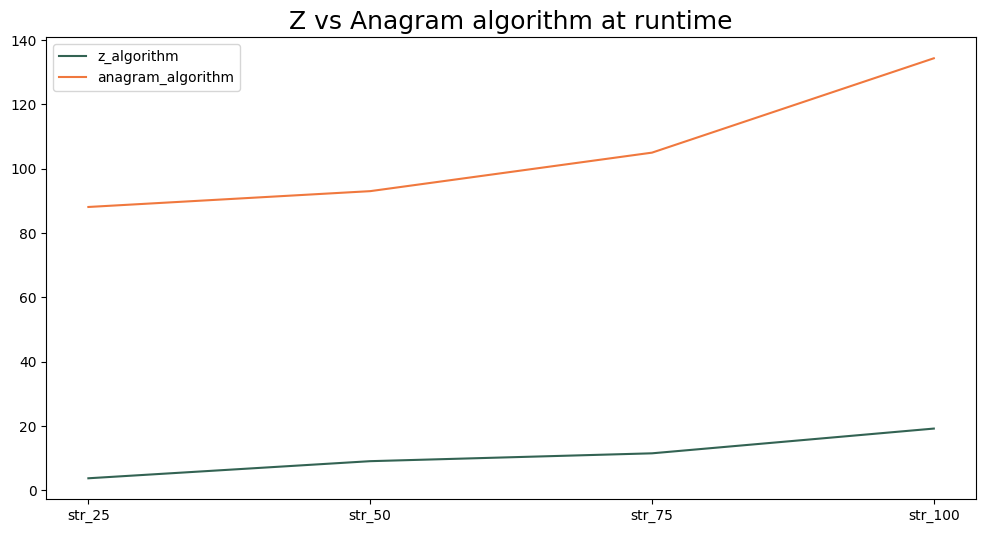

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(str_names, z_mean, color=colors[1])
ax.plot(str_names, anagram_mean, color=colors[2])
ax.legend(["z_algorithm", "anagram_algorithm"])
ax.set_title("Z vs Anagram algorithm at runtime", loc='center', fontsize=18)

In [57]:
print(z_results)
print(anagram_results)

[[4.00924825668335, 3.2951533794403076, 3.3700146675109863, 3.7080867290496826, 4.287529468536377], [7.586723804473877, 7.010268449783325, 10.752538919448853, 9.789672613143921, 10.11569333076477], [10.212713479995728, 9.624282121658325, 10.01421070098877, 11.87879204750061, 15.736286401748657], [20.595889806747437, 18.423863649368286, 16.069257736206055, 20.99057674407959, 19.850921630859375]]
[[72.09218502044678, 105.3407461643219, 98.22042608261108, 99.02778029441833, 65.71444511413574], [72.3915011882782, 82.50329351425171, 144.45106887817383, 103.19895434379578, 62.45465564727783], [79.48236298561096, 81.34442043304443, 127.58926749229431, 152.12666869163513, 84.32368421554565], [164.67227411270142, 108.18880081176758, 111.33092188835144, 143.97846484184265, 143.3694474697113]]
